CPE 695: HW1

Asad Sajid Awan

<ipython-input-54-a6680a0c8fe1>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


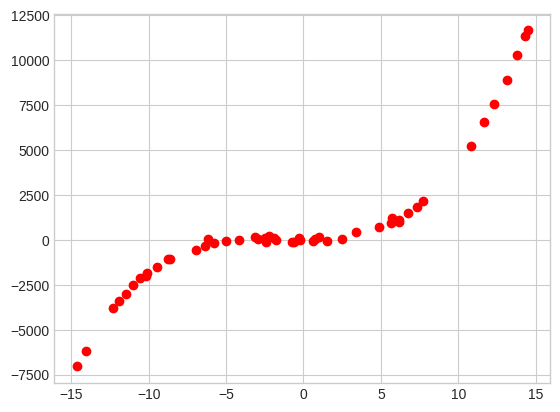

In [54]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 12 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')


1- Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

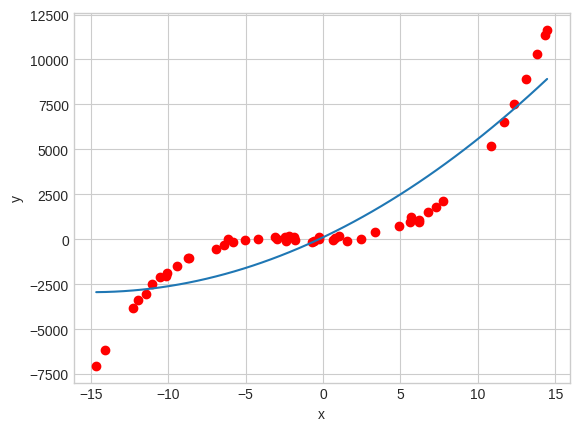

In [55]:
# was giving the error that poly.fit expects a 1d array
x = x.flatten()
y = y.flatten()


m = 2  
mymodel = np.poly1d(np.polyfit(x, y, m))

plt.plot(x, y, 'ro', label='Data Points')
x_plot = np.linspace(min(x), max(x))
plt.plot(x_plot, mymodel(x_plot))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2- Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively Identify the best choice of m.

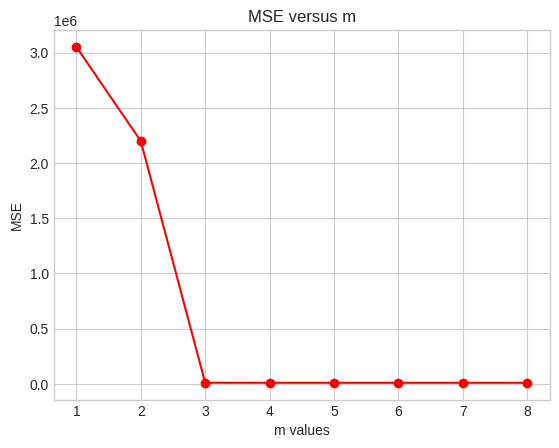

In [56]:
m_values = range(1, 9)
mse_values = []

for m in m_values:
    models = np.poly1d(np.polyfit(x, y, m))
    y_pred = models(x)
    mse = np.mean((y - y_pred)**2)
    mse_values.append(mse)

plt.plot(m_values, mse_values, 'ro-')
plt.xlabel('m values')
plt.ylabel('MSE')
plt.title('MSE versus m')
plt.show()

From the chart of MSE versus the choice of m, it seems like m = 3 is the best choice as it minimized the MSE.

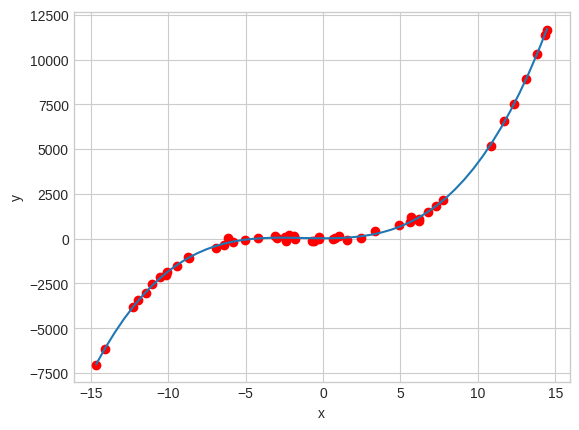

In [57]:
m = 3
mymodel = np.poly1d(np.polyfit(x, y, m))

plt.plot(x, y, 'ro', label='Data Points')
x_plot = np.linspace(min(x), max(x))
plt.plot(x_plot, mymodel(x_plot))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3- Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in (2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of noise_scale.]

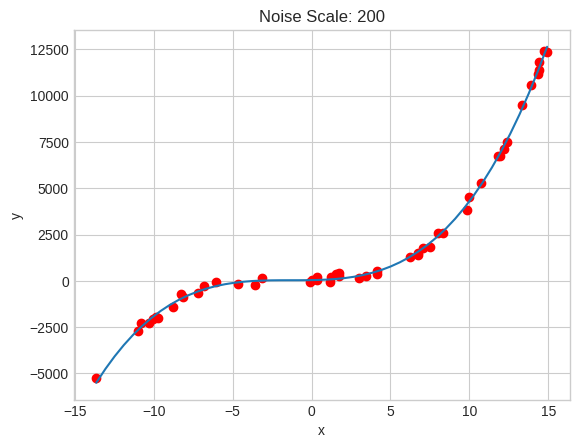

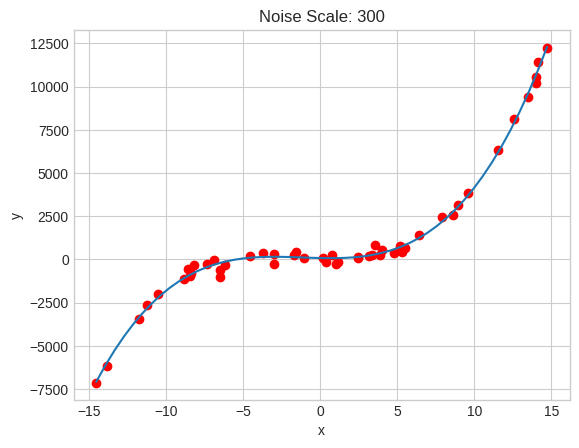

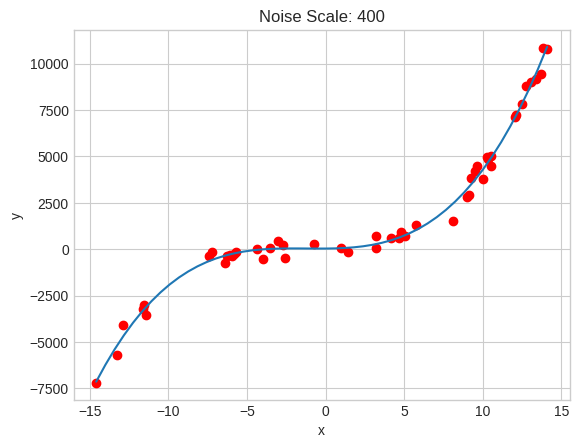

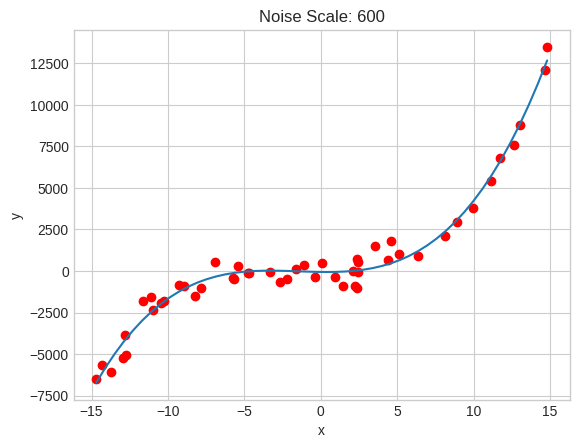

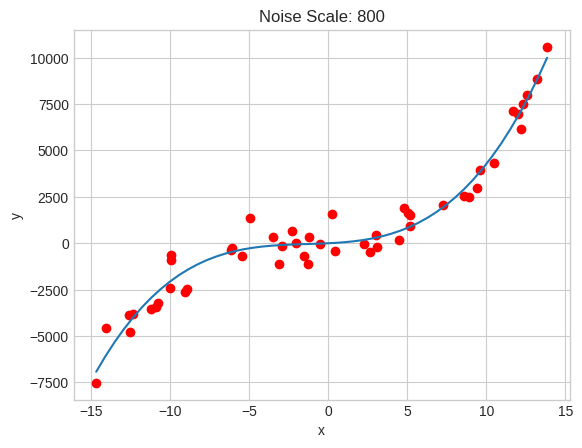

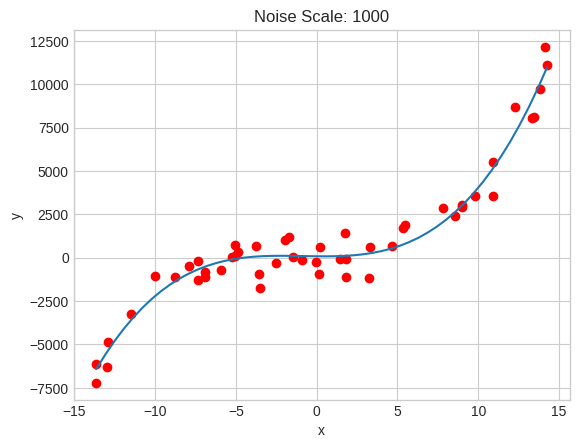

In [58]:
noise_scales = [200, 300, 400, 600, 800, 1000]

for noise_scale in noise_scales:
    number_of_samples = 50
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5)
    y = 5 * x + 12 * x**2 + 3 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)
    
    
    x = x.flatten()
    y = y.flatten()
    m = 3  # best m from (2)
    models_noise = np.poly1d(np.polyfit(x,y, m))
    
    plt.figure()
    plt.plot(x, y, 'ro')
    x_plot = np.linspace(min(x), max(x))
    plt.plot(x_plot, models_noise(x_plot))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Noise Scale: {noise_scale}")
    plt.show()


By increasing the noise in the dataset and fitting the polynomial regression, we can observe that as the noise increases, the mse also increases, hence the accuracy with with we can predict the target value, decreases. We can check that by compairing the below graph of noise_scale = 1000 with the graph we made in (2) with noise_scale  = 100.

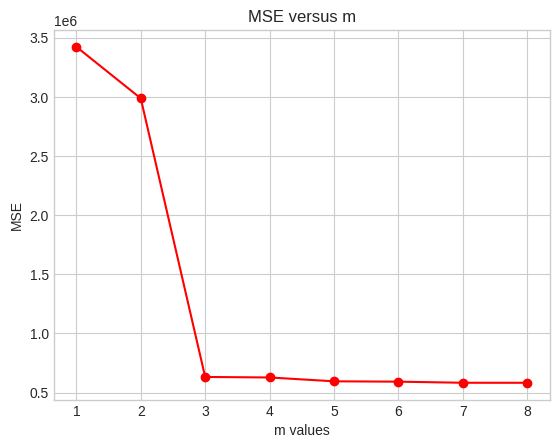

In [59]:
m_values = range(1, 9)
mse_values = []

for m in m_values:
    models = np.poly1d(np.polyfit(x, y, m))
    y_pred = models(x)
    mse = np.mean((y - y_pred)**2)
    mse_values.append(mse)

plt.plot(m_values, mse_values, 'ro-')
plt.xlabel('m values')
plt.ylabel('MSE')
plt.title('MSE versus m')
plt.show()

4- Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in (2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure like in (1) for EACH choice of
number_of_samples.]

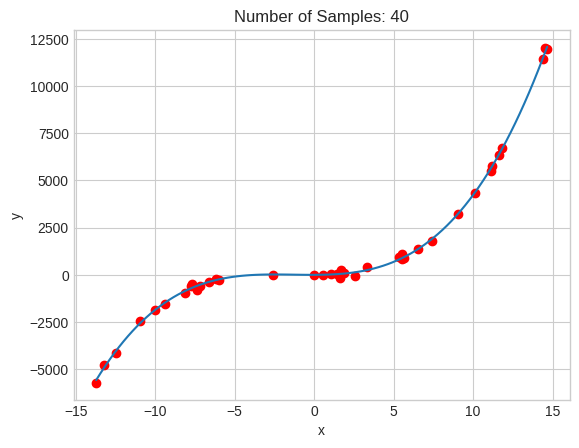

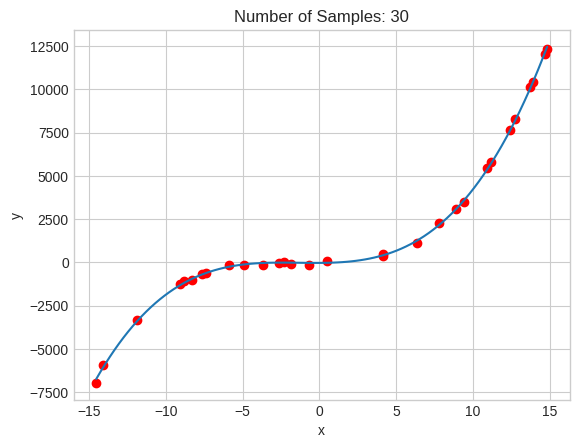

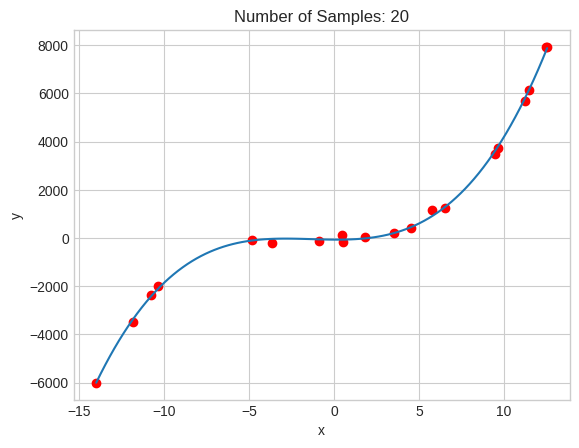

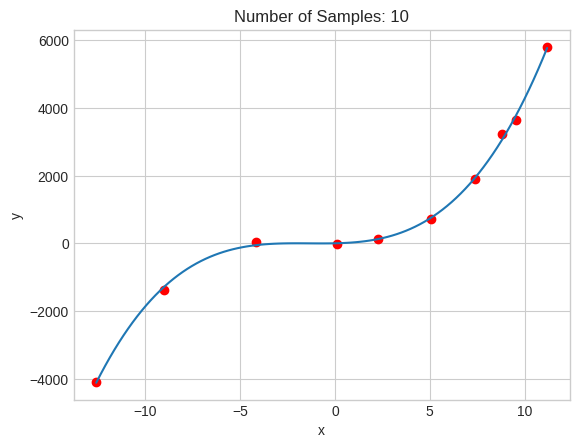

In [60]:
n = [40, 30, 20, 10]

for number_of_samples in  n:
    noise_scale = 100
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5)
    y = 5 * x + 12 * x**2 + 3 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)
    
    x = x.flatten()
    y = y.flatten()
    m = 3 
    models_samples = np.poly1d(np.polyfit(x, y, m))
    
    plt.figure()
    plt.plot(x, y, 'ro')
    x_plot = np.linspace(min(x), max(x), 100)
    plt.plot(x_plot, models_samples(x_plot))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Number of Samples: {number_of_samples}")
    plt.show()


By decreasing the number of observations in the dataset and fitting the polynomial regression, we make the algorithm more prone to overfitting as it ties to fit the very few data point it have but is not able to learn generalization. Since we don't have testing dataset here, we can't check the impact of reducing the dataset on mse. But since reducing the data results in overfitting, which cause the mse to be higher on testing data than training data.